In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## 一、感知机
### 原始形式(fit_origin ):随机梯度下降，迭代求出w，b
### 对偶形式(fit_dual):将w和b表示为实例$x_{i}$和标记$y_{i}$的线性组合形式，通过求解其系数，而求得w,b

In [2]:
class Perceptron(object):
    def __init__(self,w=np.zeros([1,2]),b=0,lr=1):
        self.w = w
        self.b = b
        self.lr = lr
        self.X = None
        
#     原始形式
    def fit_origin(self, X):
        self.X = X
        fitted = False
        while(fitted == False):
            fitted = True
            for i in range(len(X)):
                x = np.array([X[i]])
                if(x[:,-1]*(np.dot(self.w,x[:,:-1].T)+self.b) <= 0):
                    self.w += self.lr * x[:,-1] * x[:,:-1]
                    self.b += self.lr * x[:,-1]
                    fitted = False
        return self.w,self.b  
    
#    对偶形式
#     def fit_dual(self, X):
#         self.X = X
#         n = len(X)
#         alpha = [0 for i in range(n)]
#         gram = np.dot(X[:,0:-1] , X[:,0:-1].T)
#         fitted = False
#         while(fitted == False):
#             fitted = True
#             for i in range(n):
#                 item = 0
#                 yi = X[i,-1]
#                 for j in range(n):
#                     item += alpha[j] * X[j,-1] * gram[j,i]
#                 if((item+self.b)*yi <= 0):
#                     alpha[i] +=  self.lr
#                     self.b += self.lr * yi
#                     fitted = False  
#         for i in range(n):
#             self.w += alpha[i] * X[i,-1] * X[i,:-1]
            
#         return self.w,self.b
    
                
    def plot(self):
        X = self.X
        w = self.w
        b = self.b
        
        plt.figure()
        x1 = np.linspace(0, 8, 100) 
        x2 = (-b - w[0][0]*x1)/w[0][1]
        plt.plot(x1, x2, color='r')
        for i in range(len(X)):
            if(X[i][-1] == 1):
                plt.scatter(X[i][0],X[i][1],s=30,c='b',marker='o')
            else:
                plt.scatter(X[i][0],X[i][1],s=30,c='r',marker='x')
        plt.show()

In [3]:
X = np.array([[3,3,1],[4,3,1],[1,1,-1]])

[[1. 1.]] [-3]


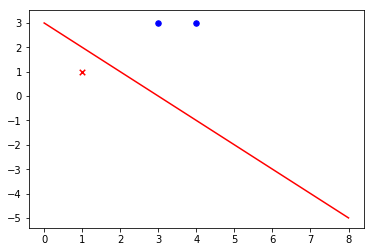

In [4]:
perceptron = Perceptron()
w,b = perceptron.fit_origin(X)
print(w,b)
perceptron.plot()